# Python AWIPS Data Access Framework

AWIPS (formerly AWIPS II or AWIPS2) is a weather forecasting display and analysis package developed by the National Weather Service and Raytheon and released as open source software by Unidata. 

AWIPS takes a unified approach to data ingest, starting with an LDM client requesting data from Unidata's IDD. Data files recevied by the LDM are decodedn by EDEX (stored as HDF5 and PostgreSQL/PostGIS metadata). In addition to the CAVE Java client, Unidata supports the [python-awips package](http://python-awips.readthedocs.io), a Data Access Framework (DAF) for requesting data from an AWIPS EDEX server. 

### Install python-awips

    pip install python-awips

Requirements: **Python >=2.7**, **Shapely >=1.4**

### From Github

    git clone https://github.com/Unidata/python-awips.git
    cd python-awips
    python setup.py install

### Install on an AWIPS system (CAVE, EDEX)

#### Using easy_install

* For Unidata AWIPS release **16.2.2+**:

        /awips2/python/bin/easy_install pip
        /awips2/python/bin/pip install python-awips
  
* For releases before and up to **16.1.5** you may need to run

        yum install awips2-python-setuptools

    

# DAF Design

The Data Access Framework is designed to provide a consistent interface for requesting and using geospatial data (for use within CAVE and EDEX). The framework supports two types of data requests: **grids** (grib, satellite, radar), and **geometries** (maps, obs, warnings, etc.)

### Supported Data Types

In [1]:
from awips.dataaccess import DataAccessLayer
DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")
dataTypes = DataAccessLayer.getSupportedDatatypes()
for datatype in dataTypes: print(datatype)

b'acars'
b'airep'
b'binlightning'
b'bufrmosavn'
b'bufrmoseta'
b'bufrmosgfs'
b'bufrmoshpc'
b'bufrmoslamp'
b'bufrmosmrf'
b'bufrmosngm'
b'bufrua'
b'climate'
b'common_obs_spatial'
b'ffmp'
b'gfe'
b'grid'
b'hydro'
b'ldadmesonet'
b'maps'
b'modelsounding'
b'obs'
b'pirep'
b'practicewarning'
b'profiler'
b'radar'
b'radar_spatial'
b'satellite'
b'sfcobs'
b'warning'


# Grid Inventory

Calling **newDataRequest()** and **setDatatype("grid")** we can print out the list of available grids:

In [2]:
request = DataAccessLayer.newDataRequest()
request.setDatatype("grid")

available_grids = DataAccessLayer.getAvailableLocationNames(request)
available_grids.sort()
for grid in available_grids: print(grid)

b'CMC'
b'DGEX'
b'ESTOFS'
b'ETSS'
b'FFG-ALR'
b'FFG-FWR'
b'FFG-KRF'
b'FFG-MSR'
b'FFG-ORN'
b'FFG-PTR'
b'FFG-RHA'
b'FFG-RSA'
b'FFG-STR'
b'FFG-TAR'
b'FFG-TIR'
b'FFG-TUA'
b'FNMOC-FAROP'
b'GFS'
b'GFS20'
b'GFSGuide'
b'GFSLAMP5'
b'GLERL'
b'GribModel:58:0:135'
b'GribModel:58:0:18'
b'GribModel:58:0:78'
b'GribModel:9:151:172'
b'HFR-EAST_6KM'
b'HFR-EAST_PR_6KM'
b'HFR-US_EAST_DELAWARE_1KM'
b'HFR-US_EAST_FLORIDA_2KM'
b'HFR-US_EAST_NORTH_2KM'
b'HFR-US_EAST_SOUTH_2KM'
b'HFR-US_EAST_VIRGINIA_1KM'
b'HFR-US_HAWAII_1KM'
b'HFR-US_HAWAII_2KM'
b'HFR-US_HAWAII_6KM'
b'HFR-US_WEST_500M'
b'HFR-US_WEST_CENCAL_2KM'
b'HFR-US_WEST_LOSANGELES_1KM'
b'HFR-US_WEST_LOSOSOS_1KM'
b'HFR-US_WEST_NORTH_2KM'
b'HFR-US_WEST_SANFRAN_1KM'
b'HFR-US_WEST_SOCAL_2KM'
b'HFR-US_WEST_WASHINGTON_1KM'
b'HFR-WEST_6KM'
b'HPCGuide'
b'HPCqpf'
b'HPCqpfNDFD'
b'HRRR'
b'HRRRX'
b'LAMP2p5'
b'MOSGuide'
b'MOSGuideExtended'
b'MPE-Local-ALR'
b'MPE-Local-MSR'
b'MPE-Local-ORN'
b'MPE-Local-RHA'
b'MPE-Local-RSA'
b'MPE-Local-SJU'
b'MPE-Local-STR'
b'MPE-Local-

### Set grid name with `setLocationNames()`

In [3]:
request.setLocationNames("RAP40")

# List Available Parameters for a Grid

This example requests the U and V wind components for the RAP 13km CONUS and plots the wind speed (total vector) as a gridded contour (color-filled isotachs, essentially), calling **getAvailableParameters()**:

In [4]:
availableParms = DataAccessLayer.getAvailableParameters(request)
availableParms.sort()
for parm in availableParms: print(parm)

b'AV'
b'BLI'
b'CAPE'
b'CFRZR'
b'CICEP'
b'CIn'
b'CP'
b'CP10hr'
b'CP11hr'
b'CP12hr'
b'CP13hr'
b'CP14hr'
b'CP15hr'
b'CP16hr'
b'CP17hr'
b'CP18hr'
b'CP1hr'
b'CP2hr'
b'CP3hr'
b'CP4hr'
b'CP5hr'
b'CP6hr'
b'CP9hr'
b'CRAIN'
b'CSNOW'
b'DpD'
b'DpT'
b'EPT'
b'GH'
b'HCDC'
b'HINDEX'
b'HPBL'
b'Heli'
b'LCDC'
b'LTNG'
b'LgSP'
b'LgSP10hr'
b'LgSP11hr'
b'LgSP12hr'
b'LgSP13hr'
b'LgSP14hr'
b'LgSP15hr'
b'LgSP16hr'
b'LgSP17hr'
b'LgSP18hr'
b'LgSP1hr'
b'LgSP2hr'
b'LgSP3hr'
b'LgSP4hr'
b'LgSP5hr'
b'LgSP6hr'
b'LgSP9hr'
b'MCDC'
b'MMSP'
b'MSTAV'
b'P'
b'PLPL'
b'PR'
b'PVV'
b'PW'
b'PoT'
b'REFD'
b'RH'
b'SH'
b'SLI'
b'SnD'
b'T'
b'TOTSN'
b'TOTSN10hr'
b'TOTSN11hr'
b'TOTSN12hr'
b'TOTSN13hr'
b'TOTSN14hr'
b'TOTSN15hr'
b'TOTSN16hr'
b'TOTSN17hr'
b'TOTSN18hr'
b'TOTSN1hr'
b'TOTSN2hr'
b'TOTSN3hr'
b'TOTSN4hr'
b'TOTSN5hr'
b'TOTSN6hr'
b'TOTSN9hr'
b'TP'
b'TP10hr'
b'TP11hr'
b'TP12hr'
b'TP13hr'
b'TP14hr'
b'TP15hr'
b'TP16hr'
b'TP17hr'
b'TP18hr'
b'TP1hr'
b'TP2hr'
b'TP3hr'
b'TP4hr'
b'TP5hr'
b'TP6hr'
b'TP9hr'
b'USTM'
b'VSTM'
b'VUCSH'
b'VVCSH'
b

### setParameters()

set the request parameter

In [5]:
request.setParameters("T")

## List Available Levels for Parameter

Using **DataAccessLayer.getAvailableLevels()**

In [6]:
availableLevels = DataAccessLayer.getAvailableLevels(request)
for level in availableLevels: print(level)

875.0b'MB'
575.0b'MB'
650.0b'MB'
675.0b'MB'
0.0b'TROP'
700.0b'MB'
250.0b'MB'
350.0b'MB'
150.0b'MB'
550.0b'MB'
375.0b'MB'
0.0b'SFC'
150.0_180.0b'BL'
120.0_150.0b'BL'
1000.0b'MB'
725.0b'MB'
125.0b'MB'
850.0b'MB'
0.0_30.0b'BL'
325.0b'MB'
225.0b'MB'
400.0b'MB'
450.0b'MB'
600.0b'MB'
2.0b'FHAG'
975.0b'MB'
950.0b'MB'
30.0_60.0b'BL'
475.0b'MB'
825.0b'MB'
425.0b'MB'
525.0b'MB'
200.0b'MB'
775.0b'MB'
60.0_90.0b'BL'
300.0b'MB'
175.0b'MB'
275.0b'MB'
100.0b'MB'
90.0_120.0b'BL'
800.0b'MB'
80.0b'FHAG'
500.0b'MB'
625.0b'MB'
925.0b'MB'
750.0b'MB'
900.0b'MB'


* **0.0SFC** is the Surface level
* **FHAG** stands for Fixed Height Above Ground (in meters)
* **NTAT** stands for Nominal Top of the ATmosphere
* **BL** stands for Boundary Layer, where **0.0_30.0BL** reads as *0-30 mb above ground level*  
* **TROP** is the Tropopause level

### request.setLevels()

For this example we will use Surface Temperatur

In [7]:
request.setLevels("0.0SFC")

### DataAccessLayer.getAvailableTimes()

* **getAvailableTimes(request, True)** will return an object of *run times* - formatted as `YYYY-MM-DD HH:MM:SS`
* **getAvailableTimes(request)** will return an object of all times - formatted as `YYYY-MM-DD HH:MM:SS (F:ff)`

In [8]:
cycles = DataAccessLayer.getAvailableTimes(request, True)
times = DataAccessLayer.getAvailableTimes(request)

# Request a Grid


In [9]:
response = DataAccessLayer.getGridData(request, [times[-1]])

In [10]:
for grid in response:
    data = grid.getRawData()
    lons, lats = grid.getLatLonCoords()
    print(str(grid.getDataTime()))
    print(data.shape)

2016-10-19 02:00:00
(151, 113)


# Plot a Grid with Matplotlib

In [11]:
%matplotlib inline
import matplotlib.tri as mtri
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs
import numpy as np
ngrid = data.shape[1]
rlons = np.repeat(np.linspace(np.min(lons), np.max(lons), ngrid),
              ngrid).reshape(ngrid, ngrid)
rlats = np.repeat(np.linspace(np.min(lats), np.max(lats), ngrid),
              ngrid).reshape(ngrid, ngrid).T
tli = mtri.LinearTriInterpolator(mtri.Triangulation(lons.flatten(),
               lats.flatten()), data.flatten())
rdata = tli(rlons, rlats)

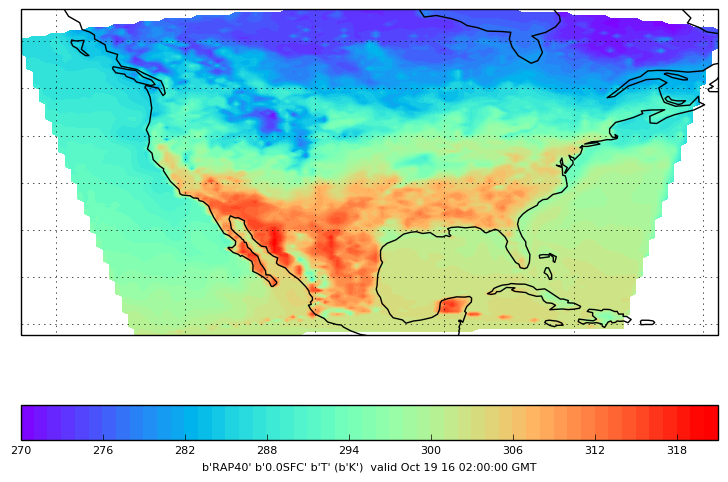

In [19]:
# Create Map
cmap = plt.get_cmap('rainbow')
matplotlib.rcParams.update({'font.size': 8})
plt.figure(figsize=(9, 6), dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())

cs = plt.contourf(rlons, rlats, rdata, 60, cmap=cmap,
                  transform=ccrs.PlateCarree(),
                  vmin=rdata.min(), vmax=rdata.max())

ax.gridlines()
ax.coastlines()
ax.set_aspect('auto', adjustable=None)

cbar = plt.colorbar(orientation='horizontal')
cbar.set_label(str(grid.getLocationName()) +" "+ str(grid.getLevel()) + " "  + str(grid.getParameter()) + " " \
        "(" + str(grid.getUnit()) + ") " + " valid " + str(grid.getDataTime().getRefTime()) )
